In [1]:
# Import all necessary modules to perform analysy on the data
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
# load the data of 2019 survey
df19 = pd.read_csv('survey_results_public.csv')


In [3]:
'''check all columns with type float64 df19
   this will help to group a desired column with the follwing columns'''

df19.loc[:, df19.dtypes == 'float64'].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 5 columns):
CompTotal        55945 non-null float64
ConvertedComp    55823 non-null float64
WorkWeekHrs      64503 non-null float64
CodeRevHrs       49790 non-null float64
Age              79210 non-null float64
dtypes: float64(5)
memory usage: 3.4 MB


In [4]:
# check if any of the columns have a nan value more than 50 in df19 %
set(df19.columns[df19.isnull().mean() > 0.5])


set()

In [5]:
'''the following code is rename C language to CPLanguage,
   so it can be categorize and not count any programing language as C language
   Also, for Java so it can't be matched with java in javascript'''

df19['LanguageWorkedWith'] = df19['LanguageWorkedWith'].str.replace(
    'C;', 'CLanguage;')
df19['LanguageWorkedWith'] = df19['LanguageWorkedWith'].str.replace(
    '+', 'P')
df19['LanguageWorkedWith'] = df19['LanguageWorkedWith'].str.replace(
    'Java;', 'JLanguage;')

df19['LanguageDesireNextYear'] = df19['LanguageDesireNextYear'].str.replace(
    'Java;', 'JLanguage;')
df19['LanguageDesireNextYear'] = df19['LanguageDesireNextYear'].str.replace(
    'C;', 'CLanguage;')
df19['LanguageDesireNextYear'] = df19['LanguageDesireNextYear'].str.replace(
    '+', 'P')
# extract all the languges were chosen by each user and convert them to columns
languagesWorkedWith = df19['LanguageWorkedWith'].str.split(';', expand=True)
languagesDesired = df19['LanguageDesireNextYear'].str.split(';', expand=True)


### The following code is to answer the question: what are the top 10 languages used by users who took the survey in 2019

In [6]:
# view to the extracted langauges
languagesWorkedWith.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,HTML/CSS,Java,JavaScript,Python,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,CPP,HTML/CSS,Python,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,HTML/CSS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,CLanguage,CPP,C#,Python,SQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,CPP,HTML/CSS,Java,JavaScript,Python,SQL,VBA,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
def languages(df):
    '''create a function to get all the languages that usres used or desired,
    to work with and remove all na values '''
    lang = []
    for c in range(df.shape[0]):
        for r in range(df.shape[1]):
            lang.append(df.iloc[c, r])
    lang = Counter(lang).most_common()
    l_df = pd.DataFrame(lang, columns=['Language', 'Users'])
    l_df.dropna(axis='rows', inplace=True)
    l_df = l_df[l_df.Language != 'C']
    l_df = l_df[l_df.Language != 'Java']
    return l_df
    

In [8]:
# Return a Dataframe contains each lanhuage and how many users use the language
current_lang = languages(languagesWorkedWith)


In [12]:
# a look at the languages with how many useres had worked with
current_lang.head()


,Language,Users
1,JavaScript,59219
2,HTML/CSS,55466
3,SQL,47544
5,Python,36443
7,Bash/Shell/PowerShell,31991


In [10]:
''' Return a Dataframe contains each lanhuage,
    and how many users desired to use the language'''
desired_lang = languages(languagesDesired)


In [13]:
# a look at the languages with how many useres desried to work with
desired_lang.head()


,Language,Users
2,JavaScript,44739
3,Python,40006
4,HTML/CSS,36645
5,SQL,33566
6,TypeScript,23720


In [14]:
def plot_lang(df, title):
    '''Create a fucntion to plot the languages,
   and apply them on worked with or desired to work with'''
    colors = ('coral', 'violet', 'lightsalmon', 'teal')
    try:
        x = list(df.iloc[0:, 0])
        plt.figure(figsize=(10, 8))
        plt.bar(x, df.Users, label=title, color=colors)
        plt.ylabel('Users')
        plt.xlabel('Languages')
        plt.title(title)
        plt.xticks(rotation=90)
        plt.legend()
        plt.gca()
        plt.savefig(title+'.jpg')
        plt.show()
    except Exception as e:
        print(f'Sorry, an error occured : {e}')


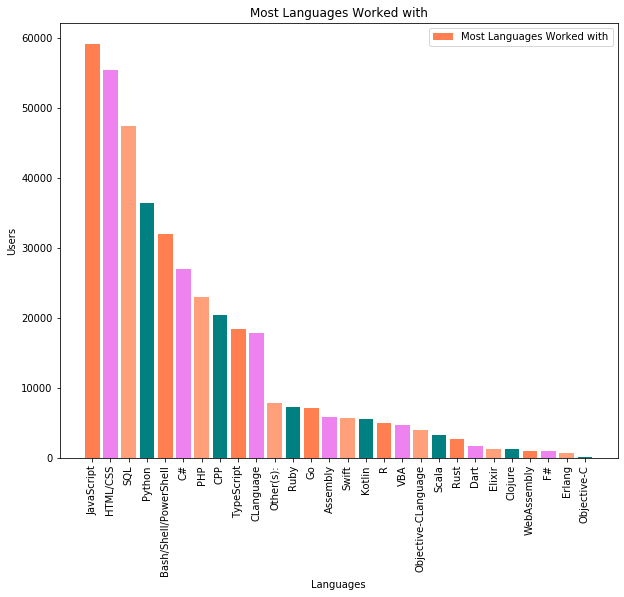

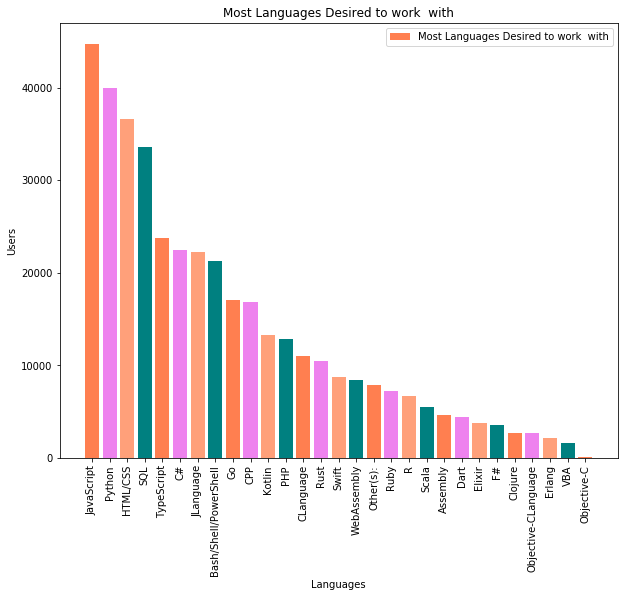

In [15]:
plot_lang(current_lang, 'Most Languages Worked with')
plot_lang(desired_lang, 'Most Languages Desired to work  with')


In [16]:
# merge above dfs to one df
cur_des = pd.merge(left=current_lang, right=desired_lang,
                   left_on='Language', right_on='Language')


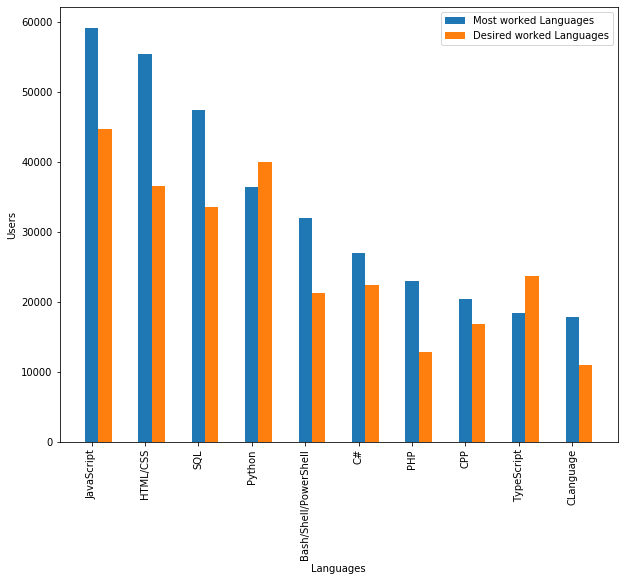

In [17]:
'''another plot by combinign both plots in one, so it will help us to see
    how many users willing to work withother language   '''
width = 0.25
x = cur_des.iloc[0:, 0]
m = np.arange(10)
plt.figure(figsize=(10, 8))
plt.bar(x[0:10], cur_des[0:10].Users_x, width=width,
        label='Most worked Languages')
plt.bar(m+width, cur_des[0:10].Users_y, width=width,
        label='Desired worked Languages')
plt.ylabel('Users')
plt.xlabel('Languages')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('WD.JPG')
plt.show()


## 2* This section will answer what languges are both
worked with and also the user desired to continue work with. 


In [19]:
# crate newdf contains only LanguageWorkedWith and LanguageDesireNextYear
newdf = df19[['LanguageWorkedWith', 'LanguageDesireNextYear']]


In [20]:
'''Count all languages occured in LanguageWorkedWith columns,
   and LanguageDesireNextYear by row '''
match = dict()
for lang in current_lang.Language:
    match[lang] = (newdf.LanguageWorkedWith.str.contains(lang) &
                   newdf.LanguageDesireNextYear.str.contains(lang)).sum()


/Users/bahhari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [21]:
match

{'JavaScript': 39555,
 'HTML/CSS': 34486,
 'SQL': 30469,
 'Python': 26644,
 'Bash/Shell/PowerShell': 19029,
 'C#': 18146,
 'PHP': 10547,
 'CPP': 10675,
 'TypeScript': 13539,
 'CLanguage': 8752,
 'Other(s):': 0,
 'Ruby': 3688,
 'Go': 4893,
 'Assembly': 3072,
 'Swift': 3972,
 'Kotlin': 4078,
 'R': 9120,
 'VBA': 1184,
 'Objective-CLanguage': 1198,
 'Scala': 1930,
 'Rust': 2332,
 'Dart': 1115,
 'Elixir': 859,
 'Clojure': 856,
 'WebAssembly': 705,
 'F#': 600,
 'Erlang': 368,
 'Objective-C': 1310}

In [102]:
'''creat dataframe containing Lnguage and Users columns,
   Users column holds the number from match dictionary above'''
data = pd.DataFrame(list(match.items()),
                    columns=['Language', 'Users']
                    ).sort_values(['Users'], ascending=False)


In [103]:
data

,Language,Users
0,JavaScript,39555
1,HTML/CSS,34486
2,SQL,30469
3,Python,26644
4,Bash/Shell/PowerShell,19029
5,C#,18146
8,TypeScript,13539
7,CPP,10675
6,PHP,10547
16,R,9120


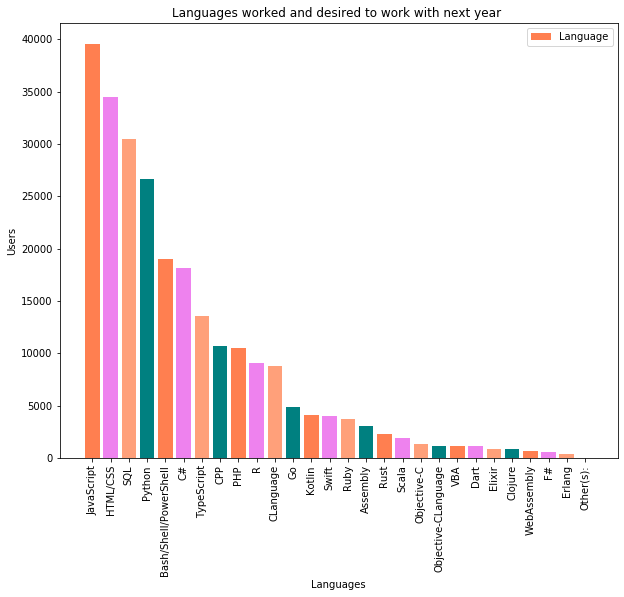

In [104]:
x = list(data.iloc[1:, 0])
plt.figure(figsize=(10, 8))
colors = ('coral', 'violet', 'lightsalmon', 'teal')
plt.bar(data.Language, data.Users, label='Language', color=colors)
plt.ylabel('Users')
plt.xlabel('Languages')
plt.title('Languages worked and desired to work with next year ')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('WDYear.jpg')
plt.show()


## 3) How many users have participated in this survey, the percentage of each, most paid and job satisfaction in each country 

In [107]:
'''
Creat a data set that contain all user participated from the Arab Countries
and perform some analysis of the most language they use,
and the most paid Counrty and job satisfaction
'''
Arabic = df19[df19['Country'].isin(
                                   ['Saudi Arabia',
                                    'Egypt',
                                    'Bahrain',
                                    'Jordan',
                                    'Qatar',
                                    'Syrian Arab Republic',
                                    'Yemen',
                                    'United Arab Emirates',
                                    'Kuwait',
                                    'Tunisia',
                                    'Morocco',
                                    'Algeria',
                                    'Libyan Arab Jamahiriya',
                                    'Oman',
                                    'Lebanon',
                                    'Iraq']
                                     )]


In [108]:
''' check the number and percentage of participants,
    from Arabic Countries in thr survey '''
print('Participants from Arabic countries:')
print(f'{round(Arabic.shape[0]/df19.shape[0]*100,1)}%')
print('Participants from Arabic countries:')
print(f'{Arabic.shape[0]} out of {df19.shape[0]}')


Participants from Arabic countries(%): 1.5%
Participants from Arabic countries:1342 out of 88883


In [109]:
# How many users by thy country

userByCountry = Counter(Arabic.Country).most_common()
ar = pd.DataFrame(userByCountry, columns=['Country', 'Users'])
ar.head()


,Country,Users
0,Egypt,323
1,United Arab Emirates,158
2,Morocco,155
3,Algeria,134
4,Tunisia,130


In [110]:
ar['Percentage'] = ar.Users/ar.shape[0]


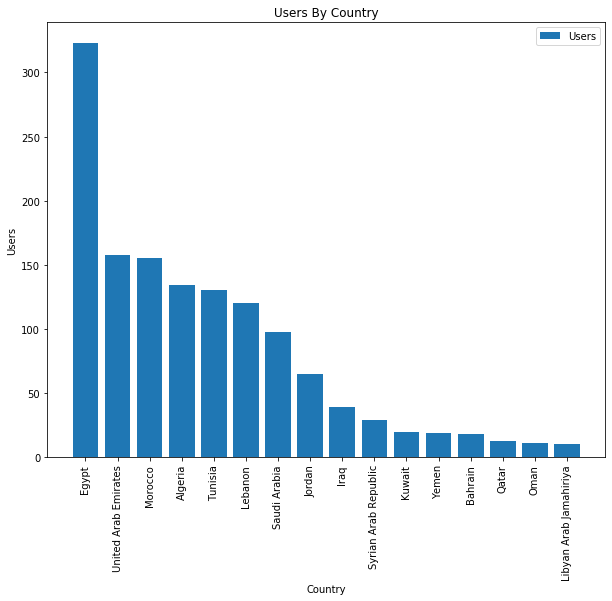

In [111]:
x=list(ar.iloc[1:,0])
plt.figure(figsize=(10,8));
plt.bar(ar.Country,ar.Users ,label='Users');
plt.ylabel('Users');
plt.xlabel('Country');
plt.title('Users By Country');
plt.xticks(rotation=90)
plt.legend();
plt.savefig('Users By Country.jpg')
plt.show();


In [113]:
def income(df, salaryconverted):
    # Get the average income for developers by country
    # Get the mean of thw Age for each employment status
    g = df.groupby(['Country']).mean()[salaryconverted].
    sort_values(ascending=False)
    # create a data set containing the mean of the income for each country
    ArabicCountry = pd.Series(c for c, _ in g.items())
    income = pd.Series(i for _, i in g.items())
    new_df = pd.DataFrame({'Country': ArabicCountry, 'Money': income})
    return new_df


In [114]:
# apply the function to y19 arabic developers
y19 = income(Arabic, 'ConvertedComp')


In [115]:
round(y19.head(),2)

,Country,Money
0,Qatar,224692.67
1,Kuwait,153294.00
2,Libyan Arab Jamahiriya,86265.00
3,Jordan,59234.71
4,United Arab Emirates,53545.66


In [116]:
def plt_arabic_income(df, year):
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Users')
    plt.title('Annual Income \'Arabs Countries\' '+year)
    plt.bar(df.Country, df.Money)
    plt.savefig('Income'+year+'.jpg')


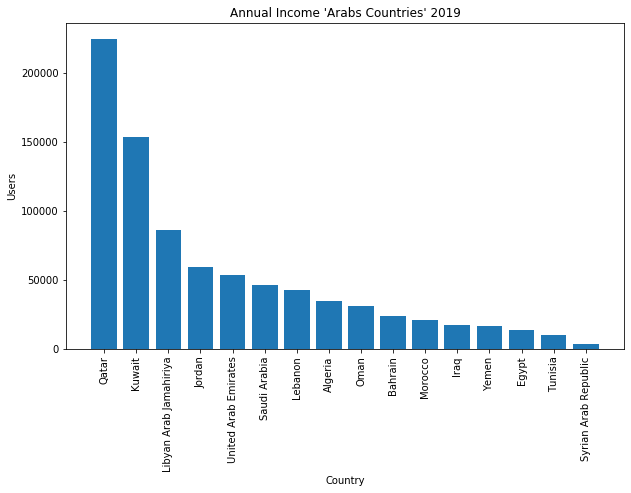

In [117]:
plt_arabic_income(y19,'2019')